In [2]:
from MongoDb import MongoDb
import numpy as np
import matplotlib.pyplot as plt

db = MongoDb('mongodb://localhost:27017')

# kryteria oceniania jakości
# cena zdrapki
# data wprowadzenia, seria
# wysokosc glownej wygranej 
# progi wygranych
# liczba dotychczasowych wygranych/ puli nagrod ktore pozostaly do wygrania 
# calkowita pula srodkow na wygrane
# naklad losow

<BarContainer object of 12 artists>

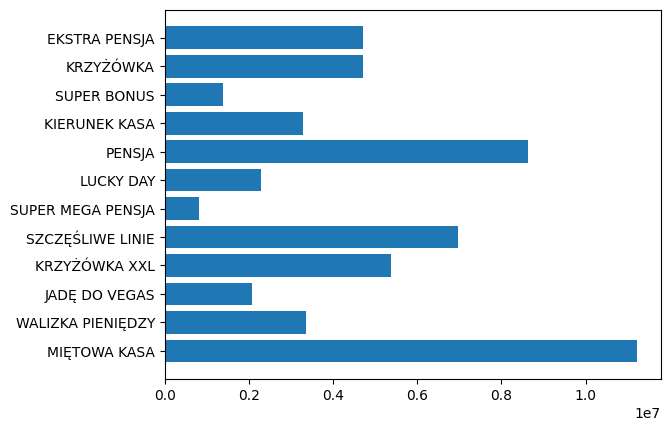

In [89]:
def pot_circ_ratio():
    cards = list(db.scratch_cards.find({}))
    results = []
    cards_name = []
    best_pot_circ_ratio = 0
    for card in cards:
        pot = float(card['pot'])
        circulation = float(card['circulation'])
        price = float(card['scratch_price'])
        tmp = pot/price
        results.append(tmp)
        cards_name.append(card['name'])
    return cards_name, results

c, r = pot_circ_ratio()
plt.barh(c,r)

<BarContainer object of 12 artists>

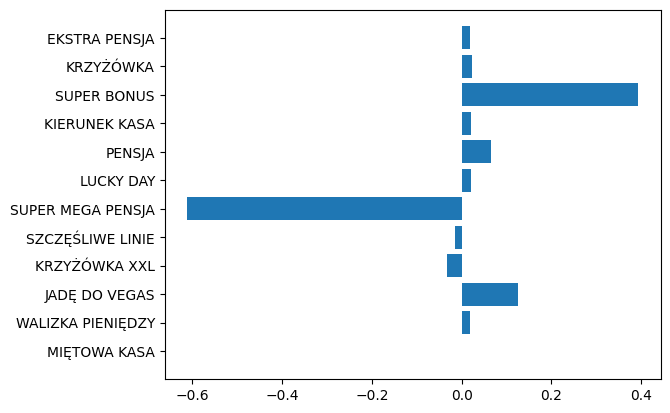

In [88]:
cards = list(db.scratch_cards.find({}))
result = []
for card in cards:
    difference = np.zeros(len(card['n_wins']), dtype=np.float16)
    for i, (n_wins, wins_left) in enumerate(zip(card['n_wins'], card['wins_left'])):
        difference[i] = (wins_left/n_wins)
    #print(card['name'], np.average(difference), card['wins_left'][0]/card['n_wins'][0], card['wins_left'][0]/card['n_wins'][0] - np.average(difference))
    result.append(card['wins_left'][0]/card['n_wins'][0] - np.average(difference))

names = [ card['name'] for card in cards]
plt.barh(names, result)
